# Compare duplicate observations

## Oct 2, 2024

* getting back to comparison after adjusting continuum scale factor by hand

In [2]:
from astropy.io import fits
from matplotlib import pyplot as plt
from astropy.table import Table
import os
import numpy as np
from scipy.stats import median_abs_deviation as MAD
%matplotlib inline

In [3]:
import collections


In [4]:
homedir = os.getenv("HOME")
tabledir = homedir+"/research/Virgo/halpha-tables/"

In [18]:
#dtab = Table.read(os.path.join(tabledir,"halphagui-output-combined-2023-Aug-24.fits"))
infile = os.path.join(tabledir,"halphagui-output-combined-2023-Aug-27.fits")
infile = os.path.join(tabledir,"halphagui-output-combined-2024-Mar-17.fits")
infile = os.path.join(tabledir,"halphagui-output-combined-2024-Mar-22.fits")
infile = os.path.join(tabledir,"from-cutouts","csgr-output-combined-2024-Sep-29.fits")
infile = os.path.join(tabledir,"hgui_csgrphot_combined.fits")
dtab = Table.read(infile)
print(len(dtab))

868


In [19]:
dtab

VFID,RA,DEC,vr,radius,NEDname,prefix,HAflag,REDSHIFT,ZDIST,GAL_RA,GAL_DEC,ELLIP_RA,ELLIP_DEC,ELLIP_HRA,ELLIP_HDEC,HA_FLAG,FILT_COR,R_FWHM,H_FWHM,POINTING,TEL,DATE-OBS,BBOX,FILTER_RATIO,RZP,HZP,PIXSCALE,GAL_XC,GAL_XC_ERR,GAL_YC,GAL_YC_ERR,GAL_MAG,GAL_MAG_ERR,GAL_RE,GAL_RE_ERR,GAL_N,GAL_N_ERR,GAL_BA,GAL_BA_ERR,GAL_PA,GAL_PA_ERR,GAL_SKY,GAL_CHISQ,BADGAL,ELLIP_XCENTROID,ELLIP_YCENTROID,ELLIP_EPS,ELLIP_THETA,ELLIP_GINI,ELLIP_HGINI,ELLIP_M20,ELLIP_HM20,ELLIP_UNMASKED_AREA,ELLIP_TOTAL_AREA,ELLIP_SUM,ELLIP_SUM_MAG,ELLIP_ASYM,ELLIP_ASYM_ERR,ELLIP_HSUM,ELLIP_HSUM_MAG,ELLIP_HASYM,ELLIP_HASYM_ERR,R_SKYNOISE,H_SKYNOISE,R_SKY,H_SKY,ELLIP_R30,ELLIP_R50,ELLIP_R90,ELLIP_HR30,ELLIP_HR50,ELLIP_HR90,GAL_R24,GAL_R24_ERR,GAL_R25,GAL_R25_ERR,GAL_R26,GAL_R26_ERR,GAL_R_F25,GAL_R_F25_ERR,GAL_R24V,GAL_R24V_ERR,GAL_R25V,GAL_R25V_ERR,GAL_R_F50,GAL_R_F50_ERR,GAL_R_F75,GAL_R_F75_ERR,GAL_M24,GAL_M24_ERR,GAL_M25,GAL_M25_ERR,GAL_M26,GAL_M26_ERR,GAL_F_30R24,GAL_F_30R24_ERR,GAL_F_R24,GAL_F_R24_ERR,GAL_C30,GAL_C30_ERR,GAL_PETRO_R,GAL_PETRO_R_ERR,GAL_PETRO_FLUX,GAL_PETRO_FLUX_ERR,GAL_PETRO_R50,GAL_PETRO_R50_ERR,GAL_PETRO_R90,GAL_PETRO_R90_ERR,GAL_PETRO_CON,GAL_PETRO_CON_ERR,GAL_PETRO_MAG,GAL_PETRO_MAG_ERR,GAL_LOG_SFR_HA,GAL_LOG_SFR_HA_ERR,GAL_LOG_SFR_HA_FLAG,GAL_SSFR_IN,GAL_SSFR_IN_ERR,GAL_SSFR_OUT,GAL_SSFR_OUT_ERR,R24,R24_ERR,R25,R25_ERR,R26,R26_ERR,R_F25,R_F25_ERR,R24V,R24V_ERR,R25V,R25V_ERR,R_F50,R_F50_ERR,R_F75,R_F75_ERR,M24,M24_ERR,M25,M25_ERR,M26,M26_ERR,F_30R24,F_30R24_ERR,F_R24,F_R24_ERR,C30,C30_ERR,PETRO_R,PETRO_R_ERR,PETRO_FLUX,PETRO_FLUX_ERR,PETRO_R50,PETRO_R50_ERR,PETRO_R90,PETRO_R90_ERR,PETRO_CON,PETRO_CON_ERR,PETRO_MAG,PETRO_MAG_ERR,HR16,HR16_ERR,HR17,HR17_ERR,HR_F25,HR_F25_ERR,HR_F50,HR_F50_ERR,HR_F75,HR_F75_ERR,HM16,HM16_ERR,HM17,HM17_ERR,HF_30R24,HF_30R24_ERR,HF_R24,HF_R24_ERR,HC30,HC30_ERR,HR_F95R24,HR_F95R24_ERR,HF_TOT,HF_TOT_ERR,HPETRO_R,HPETRO_R_ERR,HPETRO_FLUX,HPETRO_FLUX_ERR,HPETRO_R50,HPETRO_R50_ERR,HPETRO_R90,HPETRO_R90_ERR,HPETRO_CON,HPETRO_CON_ERR,HPETRO_MAG,HPETRO_MAG_ERR,LOG_SFR_HA,LOG_SFR_HA_ERR,LOG_SFR_HA_FLAG,SSFR_IN,SSFR_IN_ERR,SSFR_OUT,SSFR_OUT_ERR,CONTSUB_FLAG,MERGER_FLAG,SCATLIGHT_FLAG,ASYMR_FLAG,ASYMHA_FLAG,OVERSTAR_FLAG,OVERGAL_FLAG,PARTIAL_FLAG,EDGEON_FLAG,NUC_HA,COMMENT,SMORPH_XCENTROID,SMORPH_YCENTROID,SMORPH_RPETRO_CIRC,SMORPH_RPETRO_ELLIP,SMORPH_RHALF_ELLIP,SMORPH_R20,SMORPH_R80,SMORPH_GINI,SMORPH_M20,SMORPH_F_GM20,SMORPH_S_GM20,SMORPH_C,SMORPH_A,SMORPH_S,SMORPH_FLAG,SMORPH_HXCENTROID,SMORPH_HYCENTROID,SMORPH_HRPETRO_CIRC,SMORPH_HRPETRO_ELLIP,SMORPH_HRHALF_ELLIP,SMORPH_HR20,SMORPH_HR80,SMORPH_HGINI,SMORPH_HM20,SMORPH_HF_GM20,SMORPH_HS_GM20,SMORPH_HC,SMORPH_HA,SMORPH_HS,SMORPH_HFLAG
bytes8,float64,float64,float64,float32,bytes30,bytes36,bool,float64,float64,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,bytes40,bytes3,int32,bytes22,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float3

In [20]:
gspread = Table.read(tabledir+'hagalaxies-including-duplicates.csv')

In [17]:
gspread

galid,filter_cor,CSAUTO,CONSCALE,CS2,CSByHand,CSnotes,No Ha,remove,bright star,bright galaxy,mask prob,interest ha,sky sub r,sky sub ha,poster worthy,comment
str60,float64,float64,str4,float64,int64,str157,float64,float64,int64,float64,int64,int64,int64,int64,float64,str108
--,--,--,--,--,363,--,61.0,81.8,32,14.1,61,9,21,59,49.5,--
VFID0377-IC1210-BOK-20210414-VFID0422,1.004,1.11,1.02,--,1,"ZP ratio is ok, auto is oversubtracted;seems like there are stars near center that are messing with how CS image looks. need to mask those.",--,0.0,0,0.0,0,0,0,0,0.0,--
VFID0385-MCG+10-23-067-BOK-20210414-VFID0422,1.001,0.8,1,--,1,star masks most of the image; mask doesn't need to be that big,--,1.0,1,0.0,0,0,0,0,0.0,--
VFID0422-ARK499-BOK-20210414-VFID0422,1.01,1.0,--,--,0,hard to tell because of big absorption feature in SW of galaxy - this may actually be halpha absorption,--,0.0,0,0.0,0,0,0,0,0.0,--
VFID0448-UGC10745-BOK-20220424-VFID0483,1.003,1.03,--,--,0,a bit oversubtraction near center but should be ok,--,0.0,0,0.0,0,0,0,0,0.0,--
VFID0469-SDSSJ114145.90+605931.9-BOK-20210417-VFID0520,1.012,0.8,1,--,1,--,--,0.0,0,0.0,0,0,0,0,0.0,--
VFID0473-WISEAJ170712.75+605514.5-BOK-20220424-VFID0483,1.003,1.05,--,--,0,--,--,0.0,0,0.0,0,0,0,0,0.0,--
VFID0473-WISEAJ170712.75+605514.5-INT-20190603-p010,1.359,1.02,1,--,1,--,--,0.0,0,0.0,0,0,0,0,0.0,weird psf
VFID0474-WISEAJ114424.53+605302.6-BOK-20210417-VFID0520,1.037,1.03,--,--,0,big star nearby; looks like post merger,--,0.0,1,0.0,0,0,0,0,0.0,--


In [13]:
dtab

VFID,RA,DEC,vr,radius,NEDname,prefix,HAflag,REDSHIFT,ZDIST,GAL_RA,GAL_DEC,ELLIP_RA,ELLIP_DEC,ELLIP_HRA,ELLIP_HDEC,HA_FLAG,FILT_COR,R_FWHM,H_FWHM,POINTING,TEL,DATE-OBS,BBOX,FILTER_RATIO,RZP,HZP,PIXSCALE,GAL_XC,GAL_XC_ERR,GAL_YC,GAL_YC_ERR,GAL_MAG,GAL_MAG_ERR,GAL_RE,GAL_RE_ERR,GAL_N,GAL_N_ERR,GAL_BA,GAL_BA_ERR,GAL_PA,GAL_PA_ERR,GAL_SKY,GAL_CHISQ,BADGAL,ELLIP_XCENTROID,ELLIP_YCENTROID,ELLIP_EPS,ELLIP_THETA,ELLIP_GINI,ELLIP_HGINI,ELLIP_M20,ELLIP_HM20,ELLIP_UNMASKED_AREA,ELLIP_TOTAL_AREA,ELLIP_SUM,ELLIP_SUM_MAG,ELLIP_ASYM,ELLIP_ASYM_ERR,ELLIP_HSUM,ELLIP_HSUM_MAG,ELLIP_HASYM,ELLIP_HASYM_ERR,R_SKYNOISE,H_SKYNOISE,R_SKY,H_SKY,ELLIP_R30,ELLIP_R50,ELLIP_R90,ELLIP_HR30,ELLIP_HR50,ELLIP_HR90,GAL_R24,GAL_R24_ERR,GAL_R25,GAL_R25_ERR,GAL_R26,GAL_R26_ERR,GAL_R_F25,GAL_R_F25_ERR,GAL_R24V,GAL_R24V_ERR,GAL_R25V,GAL_R25V_ERR,GAL_R_F50,GAL_R_F50_ERR,GAL_R_F75,GAL_R_F75_ERR,GAL_M24,GAL_M24_ERR,GAL_M25,GAL_M25_ERR,GAL_M26,GAL_M26_ERR,GAL_F_30R24,GAL_F_30R24_ERR,GAL_F_R24,GAL_F_R24_ERR,GAL_C30,GAL_C30_ERR,GAL_PETRO_R,GAL_PETRO_R_ERR,GAL_PETRO_FLUX,GAL_PETRO_FLUX_ERR,GAL_PETRO_R50,GAL_PETRO_R50_ERR,GAL_PETRO_R90,GAL_PETRO_R90_ERR,GAL_PETRO_CON,GAL_PETRO_CON_ERR,GAL_PETRO_MAG,GAL_PETRO_MAG_ERR,GAL_LOG_SFR_HA,GAL_LOG_SFR_HA_ERR,GAL_LOG_SFR_HA_FLAG,GAL_SSFR_IN,GAL_SSFR_IN_ERR,GAL_SSFR_OUT,GAL_SSFR_OUT_ERR,R24,R24_ERR,R25,R25_ERR,R26,R26_ERR,R_F25,R_F25_ERR,R24V,R24V_ERR,R25V,R25V_ERR,R_F50,R_F50_ERR,R_F75,R_F75_ERR,M24,M24_ERR,M25,M25_ERR,M26,M26_ERR,F_30R24,F_30R24_ERR,F_R24,F_R24_ERR,C30,C30_ERR,PETRO_R,PETRO_R_ERR,PETRO_FLUX,PETRO_FLUX_ERR,PETRO_R50,PETRO_R50_ERR,PETRO_R90,PETRO_R90_ERR,PETRO_CON,PETRO_CON_ERR,PETRO_MAG,PETRO_MAG_ERR,HR16,HR16_ERR,HR17,HR17_ERR,HR_F25,HR_F25_ERR,HR_F50,HR_F50_ERR,HR_F75,HR_F75_ERR,HM16,HM16_ERR,HM17,HM17_ERR,HF_30R24,HF_30R24_ERR,HF_R24,HF_R24_ERR,HC30,HC30_ERR,HR_F95R24,HR_F95R24_ERR,HF_TOT,HF_TOT_ERR,HPETRO_R,HPETRO_R_ERR,HPETRO_FLUX,HPETRO_FLUX_ERR,HPETRO_R50,HPETRO_R50_ERR,HPETRO_R90,HPETRO_R90_ERR,HPETRO_CON,HPETRO_CON_ERR,HPETRO_MAG,HPETRO_MAG_ERR,LOG_SFR_HA,LOG_SFR_HA_ERR,LOG_SFR_HA_FLAG,SSFR_IN,SSFR_IN_ERR,SSFR_OUT,SSFR_OUT_ERR,CONTSUB_FLAG,MERGER_FLAG,SCATLIGHT_FLAG,ASYMR_FLAG,ASYMHA_FLAG,OVERSTAR_FLAG,OVERGAL_FLAG,PARTIAL_FLAG,EDGEON_FLAG,NUC_HA,COMMENT,SMORPH_XCENTROID,SMORPH_YCENTROID,SMORPH_RPETRO_CIRC,SMORPH_RPETRO_ELLIP,SMORPH_RHALF_ELLIP,SMORPH_R20,SMORPH_R80,SMORPH_GINI,SMORPH_M20,SMORPH_F_GM20,SMORPH_S_GM20,SMORPH_C,SMORPH_A,SMORPH_S,SMORPH_FLAG,SMORPH_HXCENTROID,SMORPH_HYCENTROID,SMORPH_HRPETRO_CIRC,SMORPH_HRPETRO_ELLIP,SMORPH_HRHALF_ELLIP,SMORPH_HR20,SMORPH_HR80,SMORPH_HGINI,SMORPH_HM20,SMORPH_HF_GM20,SMORPH_HS_GM20,SMORPH_HC,SMORPH_HA,SMORPH_HS,SMORPH_HFLAG
bytes8,float64,float64,float64,float32,bytes30,bytes36,bool,float64,float64,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,bytes40,bytes3,int32,bytes22,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float3

### Get g-r color

We want to plot some of the residuals vs g-r color.

Will read in tables and then match by VFID

In [14]:
%run ~/github/Virgo/programs/readtablesv2.py

In [392]:
v.ephot.colnames

['VFID',
 'photFlag',
 'SGA_ID',
 'VF_ID',
 'GALAXY',
 'X0_MOMENT',
 'Y0_MOMENT',
 'RA_MOMENT',
 'DEC_MOMENT',
 'SMA_MOMENT',
 'PA_MOMENT',
 'BA_MOMENT',
 'SMA_FUV',
 'INTENS_FUV',
 'INTENS_ERR_FUV',
 'EPS_FUV',
 'EPS_ERR_FUV',
 'PA_FUV',
 'PA_ERR_FUV',
 'X0_FUV',
 'X0_ERR_FUV',
 'Y0_FUV',
 'Y0_ERR_FUV',
 'A3_FUV',
 'A3_ERR_FUV',
 'A4_FUV',
 'A4_ERR_FUV',
 'RMS_FUV',
 'PIX_STDDEV_FUV',
 'STOP_CODE_FUV',
 'NDATA_FUV',
 'NFLAG_FUV',
 'NITER_FUV',
 'SMA_NUV',
 'INTENS_NUV',
 'INTENS_ERR_NUV',
 'EPS_NUV',
 'EPS_ERR_NUV',
 'PA_NUV',
 'PA_ERR_NUV',
 'X0_NUV',
 'X0_ERR_NUV',
 'Y0_NUV',
 'Y0_ERR_NUV',
 'A3_NUV',
 'A3_ERR_NUV',
 'A4_NUV',
 'A4_ERR_NUV',
 'RMS_NUV',
 'PIX_STDDEV_NUV',
 'STOP_CODE_NUV',
 'NDATA_NUV',
 'NFLAG_NUV',
 'NITER_NUV',
 'SMA_SB22',
 'SMA_SB22.5',
 'SMA_SB23',
 'SMA_SB23.5',
 'SMA_SB24',
 'SMA_SB24.5',
 'SMA_SB25',
 'SMA_SB25.5',
 'SMA_SB26',
 'SMA_IVAR_SB22',
 'SMA_IVAR_SB22.5',
 'SMA_IVAR_SB23',
 'SMA_IVAR_SB23.5',
 'SMA_IVAR_SB24',
 'SMA_IVAR_SB24.5',
 'SMA_IVAR_SB25',

In [15]:
gr = []
grflag = np.zeros(len(dtab),'bool')
indices = np.arange(len(v.main))
for i in range(len(dtab)):
    imatch = indices[dtab['VFID'][i] == v.main['VFID']]
    #print(imatch)
    # then get g-r color from John's phot table
    
    gr.append(2.5*np.log10(v.ephot['FLUX_SB23_G'][imatch]) - 2.5*np.log10(v.ephot['FLUX_SB23_R'][imatch]))
    grflag [i] = (v.ephot['FLUX_SB23_G'][imatch]>0) & ( v.ephot['FLUX_SB23_R'][imatch]> 0)
print('number with good g-r = ',np.sum(grflag),len(grflag))
gr = np.array(gr)

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':


number with good g-r =  796 868


Text(0.5, 0, 'GALFIT r mag')

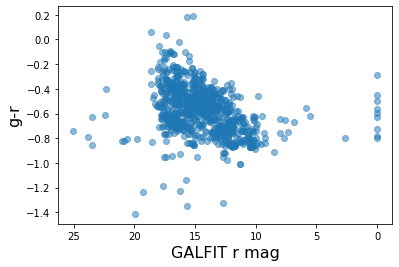

In [422]:
plt.figure()
plt.scatter(dtab['GAL_MAG'][grflag],gr[grflag],alpha=.5)
plt.gca().invert_xaxis()
plt.ylabel('g-r',fontsize=16)
plt.xlabel("GALFIT r mag",fontsize=16)
#plt.figure()
#plt.scatter(dtab['GAL_MAG'][grflag],gr[grflag])
#plt.axis([10,20,-2,2])

### Culling sample

* Creating flags to get rid of extreme outliers.

* define subtable with halpha emission

In [7]:
goodarea = dtab['ELLIP_UNMASKED_AREA']/dtab['ELLIP_TOTAL_AREA']
goodflag = (dtab['ELLIP_HRA'] > 0) & (dtab['HM16'] > 0)& (dtab['FILT_COR'] < 1.2)  & (goodarea > 0.5) & (dtab['M25'] > 0)
# these are likely halpha detections
htab = dtab[goodflag]
print(np.sum(goodflag))



filter_flag = dtab['FILT_COR'] < 1.3
ftab = dtab[goodflag & filter_flag]

609


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [8]:
# seems like I lost the code to create these different table versions

# all entries
duplist2 = ([item for item, count in collections.Counter(dtab['VFID']).items() if (count > 1)])
duplist3 = ([item for item, count in collections.Counter(dtab['VFID']).items() if count > 2])

# only sources with halpha emission
hduplist2 = ([item for item, count in collections.Counter(htab['VFID']).items() if (count > 1)])
hduplist3 = ([item for item, count in collections.Counter(htab['VFID']).items() if count > 2])

# I think this was a cut based on the filter transmission correction factor
fduplist2 = ([item for item, count in collections.Counter(ftab['VFID']).items() if (count > 1)])
fduplist3 = ([item for item, count in collections.Counter(ftab['VFID']).items() if count > 2])

In [9]:
print("number w/2 and 3 observations: ",len(duplist2),len(duplist3))
print("number of ha w/2 and 3 observations: ",len(hduplist2),len(hduplist3))

number w/2 and 3 observations:  164 23
number of ha w/2 and 3 observations:  91 11


# Function to make pair plots

/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2786: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


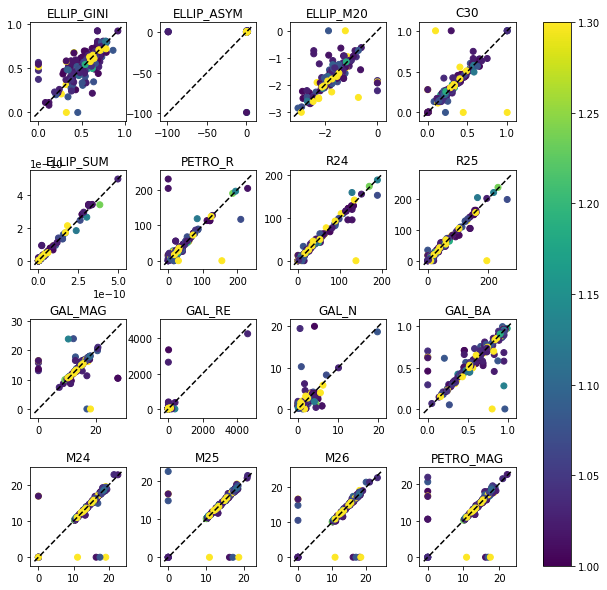

In [11]:
cols = ['ELLIP_GINI','ELLIP_ASYM','ELLIP_M20','C30',\
        'ELLIP_SUM','PETRO_R','R24','R25',\
        'GAL_MAG','GAL_RE','GAL_N','GAL_BA',\
        'M24','M25','M26','PETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
for c in cols:
    x1 = []
    x2 = []
    filtcor = []
    for vfid in duplist2:
        flag = dtab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(dtab))[flag]
            #print(dtab['VFID'][index])
            x1.append(dtab[c][index[0]])
            x2.append(dtab[c][index[1]])
            filtcor.append(np.max(dtab['FILT_COR'][index]))
            if np.sum(flag) > 2:
                x1.append(dtab[c][index[0]])
                x2.append(dtab[c][index[2]])
                filtcor.append(np.max(dtab['FILT_COR'][index[2]]))
                x1.append(dtab[c][index[1]])
                x2.append(dtab[c][index[2]])
                filtcor.append(np.max(dtab['FILT_COR'][index[2]]))
    plt.subplot(4,4,nplot)
    plt.scatter(x1,x2,c=filtcor,vmin=1,vmax=1.3)

    xmin,xmax = plt.xlim()
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    plt.title(c)
    nplot += 1
    allax.append(plt.gca())
plt.colorbar(ax=allax, fraction=0.08)

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


number with good r-band flag = 0.87 (757,873)
number of pairs = 166
number of pairs = 166
number of pairs = 166
number of pairs = 166
number of pairs = 166
number of pairs = 166
number of pairs = 166
number of pairs = 166
number of pairs = 166
number of pairs = 166
number of pairs = 166
number of pairs = 166
number of pairs = 166
number of pairs = 166
number of pairs = 166
number of pairs = 166


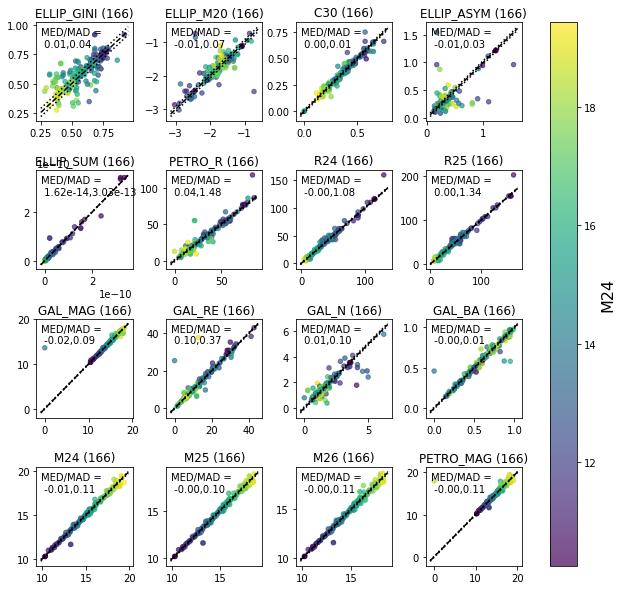

In [7]:
cols = ['ELLIP_GINI','ELLIP_M20','C30','ELLIP_ASYM',\
        'ELLIP_SUM','PETRO_R','R24','R25',\
        'GAL_MAG','GAL_RE','GAL_N','GAL_BA',\
        'M24','M25','M26','PETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5,wspace=.35)

eflag = (dtab['M26'] > 10)& (dtab['M24'] <20) & (dtab['C30'] < 1) & (dtab['GAL_RE'] < 50) & (dtab['GAL_MAG'] < 20)  & (dtab['GAL_N'] < 8) & (dtab['ELLIP_ASYM'] > -90)
etab = dtab[eflag]
print(f"number with good r-band flag = {np.sum(eflag)/len(dtab):.2f} ({np.sum(eflag)},{len(dtab)})")
eduplist2 = ([item for item, count in collections.Counter(etab['VFID']).items() if (count > 1)])
nplot = 1
allax = []

for c in cols:
    npair = 0
    x1 = []
    x2 = []
    dx = []
    filtcor = []
    for vfid in eduplist2:
        flag = etab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(etab))[flag]
            #print(dtab['VFID'][index])
            x1.append(etab[c][index[0]])
            x2.append(etab[c][index[1]])
            dx.append(etab[c][index[1]] - etab[c][index[0]])
            filtcor.append(np.max(etab['M24'][index[0]]))
            npair += 1
            if np.sum(flag) > 2:
                x1.append(etab[c][index[0]])
                x2.append(etab[c][index[2]])
                filtcor.append(np.max(etab['M24'][index[2]]))
                x1.append(etab[c][index[1]])
                x2.append(etab[c][index[2]])
                filtcor.append(np.max(etab['M24'][index[2]]))
                npair += 2
                
    plt.subplot(4,4,nplot)
    
    plt.scatter(x1,x2,c=filtcor,s=20,alpha=.7)#,vmin=1,vmax=1.3)

    xmin,xmax = plt.xlim()
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    #plt.title(c)
    plt.title(f"{c} ({npair})")
    allax.append(plt.gca())
    med = np.nanmedian(dx)
    mad =MAD(dx)
    #mad = np.nanstd(dx)
    if nplot == 5:
        plt.text(0.05,0.95,f"MED/MAD =\n {med:.2e},{mad:.2e}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
    else:
        plt.text(0.05,0.95,f"MED/MAD =\n {med:.2f},{mad:.2f}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
    print(f"number of pairs = {npair}")
    plt.plot(xline,xline+mad,'k:')
    plt.plot(xline,xline-mad,'k:')
    nplot += 1
cb = plt.colorbar(ax=allax, fraction=0.08)
cb.set_label("M24",fontsize=16)

# Comparing Halpha Measurements

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2786: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


number with good r-band flag = 0.64 (560,873)
1 HM16
number of pairs = 108
2 HM17
number of pairs = 108
3 ELLIP_HGINI
number of pairs = 108
4 HC30
number of pairs = 108
5 HR16
number of pairs = 108
6 HR17
number of pairs = 108
7 ELLIP_HM20
number of pairs = 108
8 ELLIP_HASYM
number of pairs = 108


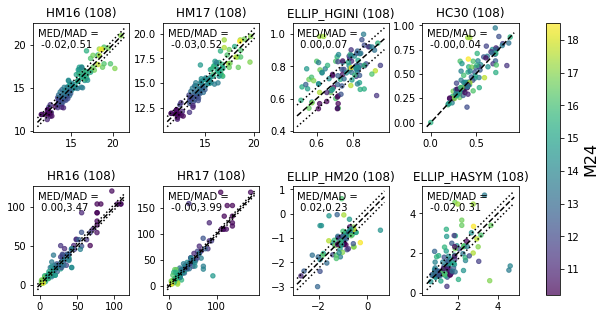

In [8]:
cols = ['HM16','HM17','HPETRO_MAG','ELLIP_HSUM_MAG',\
        'HPETRO_R','HR16','HR17',\
        'ELLIP_HGINI','ELLIP_HASYM','ELLIP_HM20','HC30']

cols = ['HM16','HM17','ELLIP_HGINI','HC30',\
        'HR16','HR17','ELLIP_HM20','ELLIP_HASYM']
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=.5,wspace=.35)

#eflag = (dtab['M24'] > 0)&(dtab['HM16'] > 0)& (dtab['HM17'] >0) & (dtab['HC30'] < 1) &(dtab['ELLIP_HASYM'] > -10)&(dtab['ELLIP_HASYM'] < 5) &  (dtab['ELLIP_HGINI'] > 0)  &  (dtab['ELLIP_HGINI']< 1)&\
#(dtab['HPETRO_R'] < 100) & (dtab['HPETRO_MAG'] > 0)

eflag = (dtab['M24'] > 0)&(dtab['HM16'] > 0)& (dtab['HM17'] >0) & (dtab['HC30'] < 1) &(dtab['ELLIP_HASYM'] > -10)&(dtab['ELLIP_HASYM'] < 5) \
&  (dtab['ELLIP_HGINI'] > 0)  &  (dtab['ELLIP_HGINI']< 1) & (dtab['HR17'] < 200)



#eflag = np.ones(len(dtab),'bool')
etab = dtab[eflag]
print(f"number with good r-band flag = {np.sum(eflag)/len(dtab):.2f} ({np.sum(eflag)},{len(dtab)})")
eduplist2 = ([item for item, count in collections.Counter(etab['VFID']).items() if (count > 1)])
nplot = 1
allax = []

for c in cols:
    npair = 0
    x1 = []
    x2 = []
    dx = []
    filtcor = []
    for vfid in eduplist2:
        flag = etab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(etab))[flag]
            #print(dtab['VFID'][index])
            x1.append(etab[c][index[0]])
            x2.append(etab[c][index[1]])
            dx.append(etab[c][index[1]] - etab[c][index[0]])
            filtcor.append(np.max(etab['M24'][index[0]]))
            npair += 1
            if np.sum(flag) > 2:
                x1.append(etab[c][index[0]])
                x2.append(etab[c][index[2]])
                dx.append(etab[c][index[0]] - etab[c][index[2]])
                filtcor.append(np.max(etab['M24'][index[2]]))
                x1.append(etab[c][index[1]])
                x2.append(etab[c][index[2]])
                dx.append(etab[c][index[1]] - etab[c][index[2]])
                filtcor.append(np.max(etab['M24'][index[2]]))
                npair += 2
    print(nplot,c)
    plt.subplot(2,4,nplot)
    
    plt.scatter(x1,x2,c=filtcor,s=20,alpha=.7)#,vmin=1,vmax=1.3)

    xmin,xmax = plt.xlim()
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    #plt.title(c)
    plt.title(f"{c} ({npair})")
    allax.append(plt.gca())
    med = np.nanmedian(dx)
    mad = MAD(dx,nan_policy="omit")
    #mad = np.nanstd(dx)
    if nplot == 4:
        #plt.gca().set_xscale('log')
        #plt.gca().set_yscale('log')
        plt.text(0.05,0.95,f"MED/MAD =\n {med:.2f},{mad:.2f}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
    else:
        plt.text(0.05,0.95,f"MED/MAD =\n {med:.2f},{mad:.2f}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
        plt.plot(xline,xline+mad,'k:')
        plt.plot(xline,xline-mad,'k:')
    print(f"number of pairs = {npair}")
    if nplot == 7:
        nplot += 1
    else:
        nplot += 1
cb = plt.colorbar(ax=allax, fraction=0.08)
cb.set_label("M24",fontsize=16)

# R-band measurements for "Halpha" sample

/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2786: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


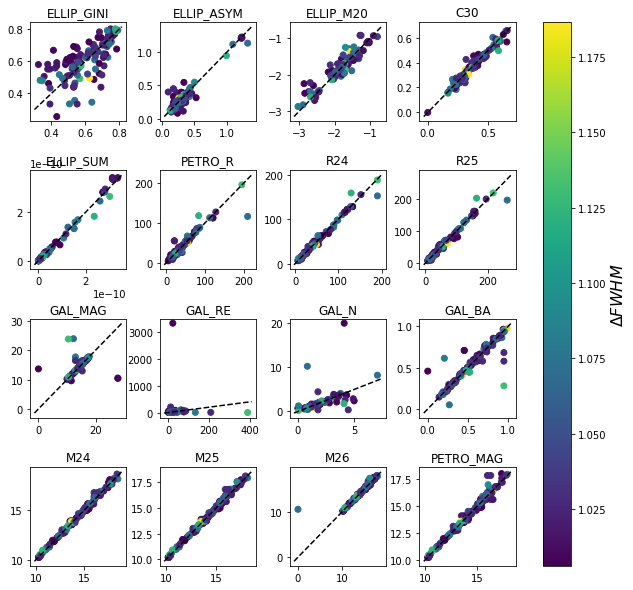

In [15]:
cols = ['ELLIP_GINI','ELLIP_ASYM','ELLIP_M20','C30',\
        'ELLIP_SUM','PETRO_R','R24','R25',\
        'GAL_MAG','GAL_RE','GAL_N','GAL_BA',\
        'M24','M25','M26','PETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
for c in cols:
    x1 = []
    x2 = []
    filtcor = []
    for vfid in hduplist2:
        flag = htab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(htab))[flag]
            #print(dtab['VFID'][index])
            if ('ASYM' in c) & ((htab['ELLIP_ASYM'][index[0]] < 0) |(htab['ELLIP_ASYM'][index[1]] < 0)) :
                continue
            x1.append(htab[c][index[0]])
            x2.append(htab[c][index[1]])
            filtcor.append(np.max(htab['FILT_COR'][index]))
            if np.sum(flag) > 2:
                x1.append(htab[c][index[0]])
                x2.append(htab[c][index[2]])
                filtcor.append(np.max(htab['FILT_COR'][index[2]]))
                x1.append(htab[c][index[1]])
                x2.append(htab[c][index[2]])
                filtcor.append(np.max(etab['FILT_COR'][index[2]]))
                npair += 2
            #filtcor.append(np.abs(htab['R_FWHM'][index[0]] -htab['R_FWHM'][index[1]]))
    plt.subplot(4,4,nplot)
    plt.scatter(x1,x2,c=filtcor)#,vmin=1,vmax=1.3)

    xmin,xmax = plt.xlim()
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    plt.title(c)
    nplot += 1
    allax.append(plt.gca())
cb = plt.colorbar(ax=allax, fraction=0.08)
#cb.set_label("Mag_SB25",size=16)
cb.set_label(r"$\Delta FWHM$",size=16)

# Plotting Residuals

/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2786: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


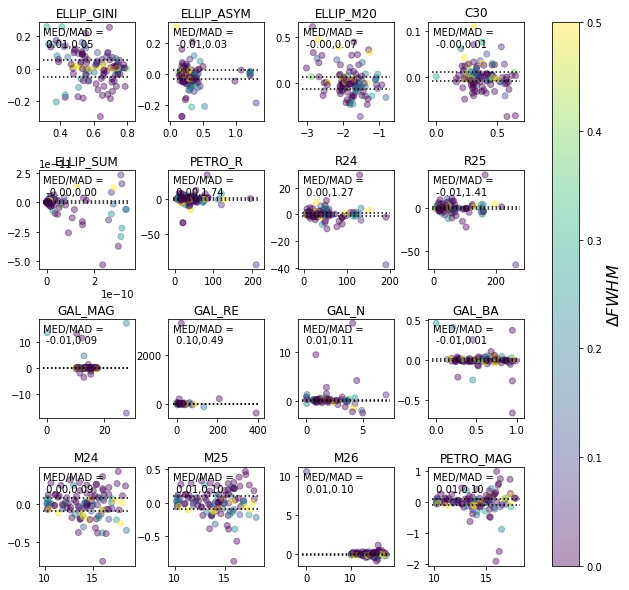

In [20]:
cols = ['ELLIP_GINI','ELLIP_ASYM','ELLIP_M20','C30',\
        'ELLIP_SUM','PETRO_R','R24','R25',\
        'GAL_MAG','GAL_RE','GAL_N','GAL_BA',\
        'M24','M25','M26','PETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
for c in cols:
    x1 = []
    x2 = []
    color = []
    dx = []
    for vfid in hduplist2:
        flag = htab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(htab))[flag]
            #print(dtab['VFID'][index])
            if ('ASYM' in c) & ((htab['ELLIP_ASYM'][index[0]] < 0) |(htab['ELLIP_ASYM'][index[1]] < 0)) :
                continue
            x1.append(htab[c][index[0]])
            x2.append(htab[c][index[1]])
            color.append(htab['R_FWHM'][index[0]]-htab['R_FWHM'][index[1]])
            dx.append(htab[c][index[1]]-htab[c][index[0]])
            #filtcor.append(np.abs(htab['R_FWHM'][index[0]] -htab['R_FWHM'][index[1]]))
            if np.sum(flag) > 2:
                x1.append(htab[c][index[0]])
                x2.append(htab[c][index[2]])
                color.append(htab['R_FWHM'][index[0]]-htab['R_FWHM'][index[2]])
                dx.append(htab[c][index[0]]-htab[c][index[2]])
                x1.append(htab[c][index[1]])
                x2.append(htab[c][index[2]])
                color.append(htab['R_FWHM'][index[1]]-htab['R_FWHM'][index[2]])
                dx.append(htab[c][index[1]]-htab[c][index[2]])

                npair += 2
    plt.subplot(4,4,nplot)
    #plt.scatter(x1,x2,c=filtcor)#,vmin=1,vmax=1.3)
    plt.scatter(x1,dx,c=color,vmin=0,vmax=.5,alpha=.4)
    
    xmin,xmax = plt.xlim()
    xline = np.linspace(xmin,xmax,100)
    
    
    med = np.nanmedian(dx)
    mad = MAD(dx,nan_policy="omit")
    plt.text(0.05,0.95,f"MED/MAD =\n {med:.2f},{mad:.2f}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
    plt.plot(xline,np.zeros(len(xline))+mad,'k:')
    plt.plot(xline,np.zeros(len(xline))-mad,'k:')

    plt.title(c)
    nplot += 1
    allax.append(plt.gca())
cb = plt.colorbar(ax=allax, fraction=0.08)
#cb.set_label("Mag_SB25",size=16)
cb.set_label(r"$\Delta FWHM$",size=16)

ELLIP_HGINI: MED/MAD = 0.03,0.11
ELLIP_HASYM: MED/MAD = 0.00,0.47
ELLIP_HM20: MED/MAD = 0.03,nan
HC30: MED/MAD = 0.00,0.04
ELLIP_HSUM: MED/MAD = -0.00,0.00


/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2786: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


HPETRO_R: MED/MAD = -0.17,6.03
HR16: MED/MAD = 0.00,3.72
HR17: MED/MAD = -0.00,5.24
HM16: MED/MAD = 0.01,0.65
HM17: MED/MAD = 0.01,0.59
HF_TOT: MED/MAD = 0.00,0.00
HPETRO_MAG: MED/MAD = 0.05,nan


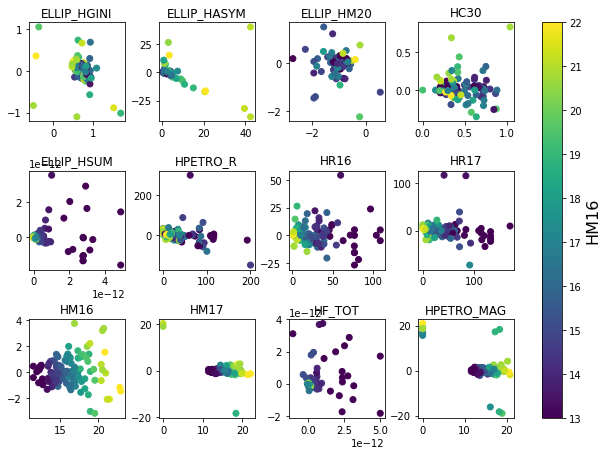

In [21]:
cols = ['ELLIP_HGINI','ELLIP_HASYM','ELLIP_HM20','HC30',\
        'ELLIP_HSUM','HPETRO_R','HR16','HR17',\
        'HM16','HM17','HF_TOT','HPETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
for i,c in enumerate(cols):
    x1 = []
    x2 = []
    dx = []
    color = []
    for vfid in hduplist2:
        flag = htab['VFID'] == vfid
        
        if np.sum(flag) > 1:
            index = np.arange(len(htab))[flag]
            if ('ASYM' in c) & ((htab['ELLIP_HASYM'][index[0]] < 0) |(htab['ELLIP_HASYM'][index[1]] < 0)) :
                continue
            
            #print(dtab['VFID'][index])
            x1.append(htab[c][index[0]])
            x2.append(htab[c][index[1]])
            dx.append(htab[c][index[1]]-htab[c][index[0]])
            color.append(np.max(htab['HM16'][index]))
            #color.append(np.max(htab['FILT_COR'][index]))
            if np.sum(flag) > 2:
                x1.append(htab[c][index[0]])
                x2.append(htab[c][index[2]])
                color.append(np.max(htab['HM16'][index]))
                dx.append(htab[c][index[0]]-htab[c][index[2]])
                x1.append(htab[c][index[1]])
                x2.append(htab[c][index[2]])
                color.append(np.max(htab['HM16'][index]))
                dx.append(htab[c][index[1]]-htab[c][index[2]])
    plt.subplot(4,4,nplot)
    #plt.scatter(x1,x2,c=color,vmin=1,vmax=1.3)
    #plt.scatter(x1,x2,c=color,vmin=13,vmax=22)
    plt.scatter(x1,dx,c=color,vmin=13,vmax=22)
    #if nplot == 1:
    #    plt.axis([0.4,1.2,0.4,1.2])
    xmin,xmax = plt.xlim()
    #plt.ylim(0,2)
    #xline = np.linspace(xmin,xmax,100)
    #plt.plot(xline,xline,'k--')
    plt.title(c)
    nplot += 1
    allax.append(plt.gca())
    print(f"{c}: MED/MAD = {np.nanmedian(dx):.2f},{MAD(dx):.2f}")
cb = plt.colorbar(ax=allax, fraction=0.08)
cb.set_label(label="HM16",size=16)

### Magnitude residuals vs color

number with good r-band flag = 0.87 (757,873)
number of pairs = 131
number of pairs = 131
number of pairs = 131
number of pairs = 131


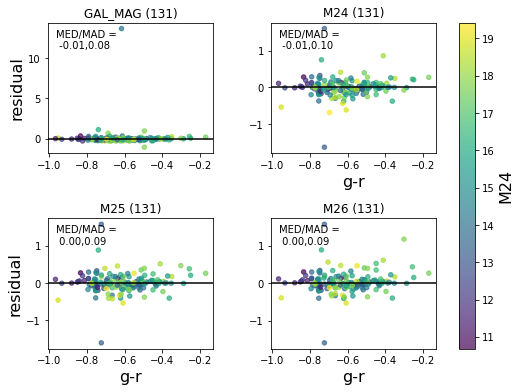

In [25]:
# R band
cols = ['GAL_MAG','M24','M25','M26']#,'PETRO_MAG']
plt.figure(figsize=(8,6))
plt.subplots_adjust(hspace=.5,wspace=.35)

eflag = (dtab['M26'] > 10)& (dtab['M24'] <20) & (dtab['C30'] < 1) & (dtab['GAL_RE'] < 50) & (dtab['GAL_MAG'] < 20)  & (dtab['GAL_N'] < 8) & (dtab['ELLIP_ASYM'] > -90)
etab = dtab[eflag & grflag]
egr = gr[eflag & grflag]
print(f"number with good r-band flag = {np.sum(eflag)/len(dtab):.2f} ({np.sum(eflag)},{len(dtab)})")
eduplist2 = ([item for item, count in collections.Counter(etab['VFID']).items() if (count > 1)])
nplot = 1
allax = []

for c in cols:
    npair = 0
    x1 = []
    x2 = []
    dx = []
    filtcor = []
    grx = []
    for vfid in eduplist2:
        flag = etab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(etab))[flag]
            #print(dtab['VFID'][index])
            x1.append(etab[c][index[0]])
            x2.append(etab[c][index[1]])
            dx.append(etab[c][index[1]] - etab[c][index[0]])
            #print(etab[flag][0])
            grx.append(egr[flag][0])
            filtcor.append(np.max(etab['M24'][index[0]]))
            npair += 1
            if np.sum(flag) > 2:
                x1.append(etab[c][index[0]])
                x2.append(etab[c][index[2]])
                filtcor.append(np.max(etab['M24'][index]))
                dx.append(etab[c][index[0]]-etab[c][index[2]])
                grx.append(egr[flag][1])
                
                x1.append(etab[c][index[1]])
                x2.append(etab[c][index[2]])
                filtcor.append(np.max(etab['M24'][index]))
                dx.append(etab[c][index[1]]-etab[c][index[2]])
                grx.append(egr[flag][2])
    plt.subplot(2,2,nplot)
    
    plt.scatter(np.array(grx),np.array(dx),c=filtcor,s=20,alpha=.7)#,vmin=1,vmax=1.3)

    xmin,xmax = plt.xlim()
    xline = np.linspace(xmin,xmax,100)
    #plt.plot(xline,xline,'k--')
    #plt.title(c)
    plt.title(f"{c} ({npair})")
    allax.append(plt.gca())
    med = np.nanmedian(dx)
    mad =MAD(dx)
    #mad = np.nanstd(dx)
    if nplot == 5:
        plt.text(0.05,0.95,f"MED/MAD =\n {med:.2e},{mad:.2e}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
    else:
        plt.text(0.05,0.95,f"MED/MAD =\n {med:.2f},{mad:.2f}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
    print(f"number of pairs = {npair}")
    #plt.plot(xline,xline+mad,'k:')
    #plt.plot(xline,xline-mad,'k:')
    
    # add a y=0 line
    plt.axhline(y=0,c='k')
    
    if nplot > 1:
        plt.xlabel('g-r',fontsize=16)
    if nplot%2 == 1:
        plt.ylabel('residual',fontsize=16)
    nplot += 1
cb = plt.colorbar(ax=allax, fraction=0.08)
cb.set_label("M24",fontsize=16)


number with good r-band flag = 0.87 (757,873)
1 GAL_MAG
number of pairs = 161
2 M24
number of pairs = 161
3 M25
number of pairs = 161
4 M26
number of pairs = 161


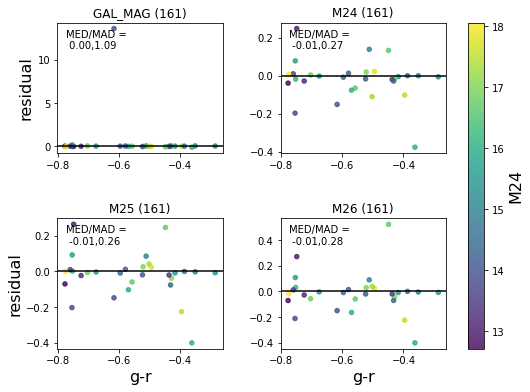

In [27]:
# Halpha


cols = ['HM16','HM17',\
        'HR16','HR17']
plt.figure(figsize=(8,6))
plt.subplots_adjust(hspace=.5,wspace=.35)

#eflag = (dtab['M24'] > 0)&(dtab['HM16'] > 0)& (dtab['HM17'] >0) & (dtab['HC30'] < 1) &(dtab['ELLIP_HASYM'] > -10)&(dtab['ELLIP_HASYM'] < 5) &  (dtab['ELLIP_HGINI'] > 0)  &  (dtab['ELLIP_HGINI']< 1)&\
#(dtab['HPETRO_R'] < 100) & (dtab['HPETRO_MAG'] > 0)

eflag = (dtab['M24'] > 0)&(dtab['HM16'] > 0)& (dtab['HM17'] >0) & (dtab['HC30'] < 1) &(dtab['ELLIP_HASYM'] > -10)&(dtab['ELLIP_HASYM'] < 5) \
&  (dtab['ELLIP_HGINI'] > 0)  &  (dtab['ELLIP_HGINI']< 1) & (dtab['HR17'] < 200)

cols = ['GAL_MAG','M24','M25','M26']#,'PETRO_MAG']
#plt.figure(figsize=(8,6))
#plt.subplots_adjust(hspace=.5,wspace=.35)

eflag = (dtab['M26'] > 10)& (dtab['M24'] <20) & (dtab['C30'] < 1) & (dtab['GAL_RE'] < 50) & (dtab['GAL_MAG'] < 20)  & (dtab['GAL_N'] < 8) & (dtab['ELLIP_ASYM'] > -90)


#eflag = np.ones(len(dtab),'bool')
etab = dtab[eflag & grflag]
egr = gr[eflag & grflag]
print(f"number with good r-band flag = {np.sum(eflag)/len(dtab):.2f} ({np.sum(eflag)},{len(dtab)})")
eduplist2 = ([item for item, count in collections.Counter(etab['VFID']).items() if (count > 1)])
nplot = 1
allax = []

for c in cols:
    npair = 0
    x1 = []
    x2 = []
    dx = []
    grx = []
    filtcor = []
    dtel = []
    names = []
    for vfid in eduplist2:
        flag = etab['VFID'] == vfid
        if np.sum(flag) > 1:
            names.append(etab['POINTING'][flag])
            index = np.arange(len(etab))[flag]
            #print(dtab['VFID'][index])
            x1.append(etab[c][index[0]])
            x2.append(etab[c][index[1]])
            dx.append(etab[c][index[1]] - etab[c][index[0]])
            dtel.append(etab['TEL'][index[1]] == etab['TEL'][index[0]])
            grx.append(egr[flag][0])
            filtcor.append(np.max(etab['M24'][index[0]]))
            npair += 1
            if np.sum(flag) > 2:
                x1.append(etab[c][index[0]])
                x2.append(etab[c][index[2]])
                filtcor.append(np.max(etab['M24'][index]))
                dx.append(etab[c][index[0]]-etab[c][index[2]])
                grx.append(egr[flag][1])
                dtel.append(etab['TEL'][index[0]] == etab['TEL'][index[2]])
                names.append(etab['POINTING'][flag])
                
                x1.append(etab[c][index[1]])
                x2.append(etab[c][index[2]])
                filtcor.append(np.max(etab['M24'][index]))
                dx.append(etab[c][index[1]]-etab[c][index[2]])
                grx.append(egr[flag][2])
                dtel.append(etab['TEL'][index[1]] == etab['TEL'][index[2]])
                names.append(etab['POINTING'][flag])
                
                npair += 2
    print(nplot,c)
    plt.subplot(2,2,nplot)
    dtel = np.array(dtel,'bool')
    #dtel = np.ones(len(dtel),'bool')
    grx = np.array(grx)
    dx = np.array(dx)
    filtcor = np.array(filtcor)
    #plt.scatter(x1,x2,c=filtcor,s=20,alpha=.7)#,vmin=1,vmax=1.3)
    plt.scatter(grx[dtel],dx[dtel],c=filtcor[dtel],s=20,alpha=.8)#,vmin=1,vmax=1.3)
    xmin,xmax = plt.xlim()
    
    # add a y=0 line
    plt.axhline(y=0,c='k')
    
    #xline = np.linspace(xmin,xmax,100)
    #plt.plot(xline,xline,'k--')
    #plt.title(c)
    plt.title(f"{c} ({npair})")
    allax.append(plt.gca())
    med = np.nanmedian(dx[dtel])
    mad = MAD(dx[dtel],nan_policy="omit")
    mad = np.nanstd(dx)
    if nplot == 4:
        #plt.gca().set_xscale('log')
        #plt.gca().set_yscale('log')
        plt.text(0.05,0.95,f"MED/MAD =\n {med:.2f},{mad:.2f}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
    else:
        plt.text(0.05,0.95,f"MED/MAD =\n {med:.2f},{mad:.2f}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
        #plt.plot(xline,xline+mad,'k:')
        #plt.plot(xline,xline-mad,'k:')
    print(f"number of pairs = {npair}")
    if nplot > 2:
        plt.xlabel('g-r',fontsize=16)
    if nplot%2 == 1:
        plt.ylabel('residual',fontsize=16)
        
    # plot names of outliers to we can inspect results
    
    badflag = np.abs(dx) > 1
    
    names = np.array(names)
    badnames = names[badflag]
    #for b in badnames:
    #    print(b)
    
    nplot += 1
cb = plt.colorbar(ax=allax, fraction=0.08)
cb.set_label("M24",fontsize=16)

In [28]:
np.array(grx)[dtel]

array([[-0.28650427],
       [-0.3962264 ],
       [-0.5116806 ],
       [-0.75153637],
       [-0.5573101 ],
       [-0.56941605],
       [-0.77623177],
       [-0.5792351 ],
       [-0.5960245 ],
       [-0.38688612],
       [-0.41733456],
       [-0.4287634 ],
       [-0.436903  ],
       [-0.44874334],
       [-0.7535391 ],
       [-0.7478695 ],
       [-0.7526684 ],
       [-0.36268473],
       [-0.61642456],
       [-0.49473763],
       [-0.5216694 ],
       [-0.72369385],
       [-0.75941086],
       [-0.5235143 ],
       [-0.7029748 ],
       [-0.6748085 ],
       [-0.35168982],
       [-0.7737856 ],
       [-0.5022721 ],
       [-0.4320507 ]], dtype=float32)

# STATMORPH

number with good statmorph flag = 0.66 (576,873)
npairs =  80
npairs =  80
npairs =  80
npairs =  80
npairs =  80


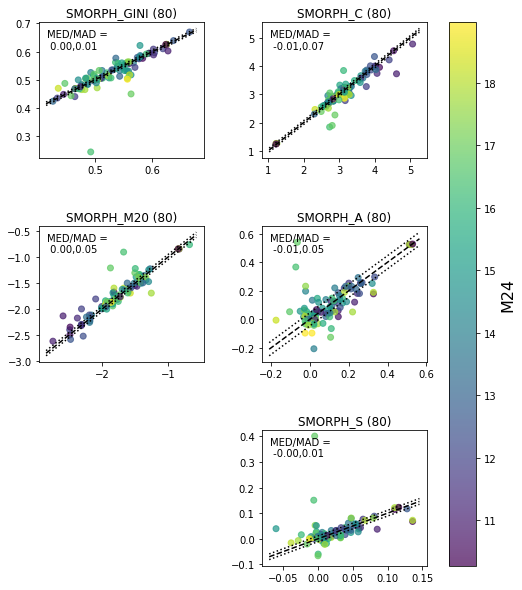

In [29]:
cols = ['SMORPH_GINI','SMORPH_M20','SMORPH_C','SMORPH_A','SMORPH_S']
positions = [1,3,2,4,6]
plt.figure(figsize=(8,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
sflag = (dtab['SMORPH_XCENTROID'] > 0) & (dtab['SMORPH_S'] > -.1)
stab = dtab[sflag]
print(f"number with good statmorph flag = {np.sum(sflag)/len(dtab):.2f} ({np.sum(sflag)},{len(dtab)})")
sduplist2 = ([item for item, count in collections.Counter(stab['VFID']).items() if (count > 1)])
for i,c in enumerate(cols):
    x1 = []
    x2 = []
    dx = []
    color = []
    npair = 0
    for vfid in sduplist2:
        flag = stab['VFID'] == vfid
        
        if np.sum(flag) > 1:
            index = np.arange(len(stab))[flag]
            #flag = htab['SMORPH_XCENTROID'] == 0
            
            #print(dtab['VFID'][index])
            x1.append(stab[c][index[0]])
            x2.append(stab[c][index[1]])
            dx.append(stab[c][index[1]]-stab[c][index[0]])
            color.append(np.max(stab['M24'][index]))
            #color.append(np.max(htab['FILT_COR'][index]))
            npair += 1
            if np.sum(flag) > 2:
                x1.append(stab[c][index[0]])
                x2.append(stab[c][index[2]])
                dx.append(stab[c][index[0]]-stab[c][index[2]])
                color.append(np.max(etab['M24'][index]))
                
                x1.append(stab[c][index[1]])
                x2.append(stab[c][index[2]])
                color.append(np.max(etab['M24'][index]))
                dx.append(stab[c][index[1]]-stab[c][index[2]])
                npair += 2
    print("npairs = ",npair)
    plt.subplot(3,2,positions[i])
    #plt.scatter(x1,x2,c=color,vmin=1,vmax=1.3)
    #plt.scatter(x1,x2,c=color,vmin=13,vmax=22)
    plt.scatter(x1,x2,c=color,alpha=.7)
    #if nplot == 1:
    #    plt.axis([0.4,1.2,0.4,1.2])
    xmin,xmax = plt.xlim()
    #plt.ylim(0,2)
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    plt.title(f"{c} ({npair})")
    nplot += 1
    allax.append(plt.gca())
    med = np.nanmedian(dx)
    mad = MAD(dx)
    
    plt.text(0.05,0.95,f"MED/MAD =\n {med:.2f},{mad:.2f}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
    plt.plot(xline,xline+mad,'k:')
    plt.plot(xline,xline-mad,'k:')
cb = plt.colorbar(ax=allax, fraction=0.08)
cb.set_label(label="M24",size=16)

number with good statmorph flag = 0.59 (518,873)
npairs =  84
npairs =  84
npairs =  84
npairs =  84
npairs =  84


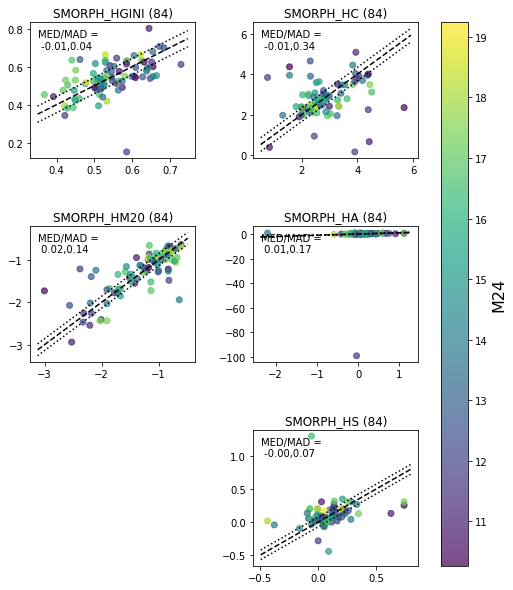

In [30]:
cols = ['SMORPH_HGINI','SMORPH_HM20','SMORPH_HC','SMORPH_HA','SMORPH_HS']
positions = [1,3,2,4,6]
plt.figure(figsize=(8,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
sflag = (dtab['SMORPH_HXCENTROID'] > 0) & (dtab['SMORPH_S'] > -.1) &(dtab['SMORPH_HGINI'] > -90) &(dtab['SMORPH_HM20'] > -90) &(dtab['SMORPH_HS'] > -.5)
stab = dtab[sflag]
print(f"number with good statmorph flag = {np.sum(sflag)/len(dtab):.2f} ({np.sum(sflag)},{len(dtab)})")
sduplist2 = ([item for item, count in collections.Counter(stab['VFID']).items() if (count > 1)])
for i,c in enumerate(cols):
    x1 = []
    x2 = []
    dx = []
    color = []
    npair = 0
    for vfid in sduplist2:
        flag = stab['VFID'] == vfid
        
        if np.sum(flag) > 1:
            index = np.arange(len(stab))[flag]
            #flag = htab['SMORPH_XCENTROID'] == 0
            
            #print(dtab['VFID'][index])
            x1.append(stab[c][index[0]])
            x2.append(stab[c][index[1]])
            dx.append(stab[c][index[1]]-stab[c][index[0]])
            color.append(np.max(stab['M24'][index]))
            #color.append(np.max(htab['FILT_COR'][index]))
            npair += 1
            if np.sum(flag) > 2:
                x1.append(stab[c][index[0]])
                x2.append(stab[c][index[2]])
                dx.append(stab[c][index[0]]-stab[c][index[2]])
                color.append(np.max(etab['M24'][index]))
                
                x1.append(stab[c][index[1]])
                x2.append(stab[c][index[2]])
                color.append(np.max(etab['M24'][index]))
                dx.append(stab[c][index[1]]-stab[c][index[2]])
                npair += 2
    print("npairs = ",npair)
    plt.subplot(3,2,positions[i])
    #plt.scatter(x1,x2,c=color,vmin=1,vmax=1.3)
    #plt.scatter(x1,x2,c=color,vmin=13,vmax=22)
    plt.scatter(x1,x2,c=color,alpha=.7)
    #if nplot == 1:
    #    plt.axis([0.4,1.2,0.4,1.2])
    xmin,xmax = plt.xlim()
    #plt.ylim(0,2)
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    #plt.title(c)
    plt.title(f"{c} ({npair})")
    nplot += 1
    allax.append(plt.gca())
    med = np.nanmedian(dx)
    mad = MAD(dx)
    
    plt.text(0.05,0.95,f"MED/MAD =\n {med:.2f},{mad:.2f}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
    plt.plot(xline,xline+mad,'k:')
    plt.plot(xline,xline-mad,'k:')
cb = plt.colorbar(ax=allax, fraction=0.08)
cb.set_label(label="M24",size=16)

### Distribution of Observations between telescopes

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

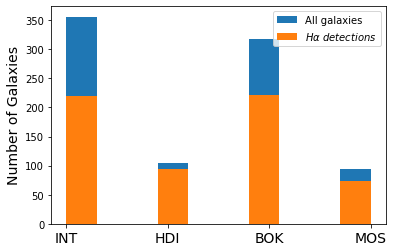

In [31]:
plt.figure()
mybins = ['INT','BOK','HDI','MOS']
plt.hist(dtab['TEL'],label='All galaxies')
plt.hist(htab['TEL'],label=r'$H\alpha \ detections$')
plt.legend()
plt.ylabel("Number of Galaxies",fontsize=14)
plt.xticks(fontsize=14)

# REMOVING DUPLICATES: How to select best galaxy?

NEED TO REMOVE DUPLICATE ROWS
could give preference to galaxies that have
- more measurements reported: GALFIT, ELLIP, SMORPH
- lower filter correction
- better seeing
- lower sky noise
- better coverage on CCD (like not near edge) - but I don't really track this...
 - maybe a square image vs rectangle?


In [9]:
ftab = dtab#[(dtab['FILT_COR'] < 1.2)]
fduplist = ([item for item, count in collections.Counter(ftab['VFID']).items() if (count > 1)])

In [10]:
# create a flag for each subset of measurements
ephot_flag = (dtab['M26'] > 10)& (dtab['M24'] <20)  
rad_flag = dtab['R24'] > 0
galfit_flag = (dtab['GAL_RE'] < 50) & (dtab['GAL_MAG'] < 20)  & (dtab['GAL_N'] < 8) 
morph_flag = (dtab['ELLIP_ASYM'] > -90)& (dtab['C30'] < 1) 
smorph_flag = (dtab['SMORPH_XCENTROID'] > 0) & (dtab['SMORPH_S'] > -.1)


ephot_hflag = (dtab['HM16'] > 0)& (dtab['HM17'] >0) 
rad_hflag = (dtab['HR16'] > 0) & (dtab['HR17'] < 200)
morph_hflag = (dtab['HC30'] < 1) &(dtab['ELLIP_HASYM'] > -10)&(dtab['ELLIP_HASYM'] < 5) &  (dtab['ELLIP_HGINI'] > 0)  &  (dtab['ELLIP_HGINI']< 1) 
smorph_hflag = (dtab['SMORPH_HXCENTROID'] > 0) & (dtab['SMORPH_S'] > -.1) &(dtab['SMORPH_HGINI'] > -90) &(dtab['SMORPH_HM20'] > -90) &(dtab['SMORPH_HS'] > -.5)




galfit_flag = np.array(galfit_flag,'i')
ephot_flag = np.array(ephot_flag,'i')
rad_flag = np.array(rad_flag,'i')
morph_flag = np.array(morph_flag,'i')

smorph_flag = np.array(smorph_flag,'i')
#goodarea = dtab['ELLIP_UNMASKED_AREA']/dtab['ELLIP_TOTAL_AREA']
ephot_hflag = np.array(ephot_hflag,'i')
rad_hflag = np.array(rad_hflag,'i')
morph_hflag = np.array(morph_hflag,'i')
smorph_hflag = np.array(smorph_hflag,'i')
# should compare two values
filter_flag = (ftab['FILT_COR']< 1.1)

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


In [11]:
from scipy import stats

In [12]:
# allpointing = ftab['POINTING']
tocut = []
neasy = 0
for vfid in fduplist:
    # find the rows in the dtab
    matchrows = ftab['VFID'] == vfid
    matchindex = np.arange(len(ftab))[matchrows]
    print()
    print(vfid)
    print()
    rflags = []
    hflags = []
    filtcor = []
    pointing = []
    rfwhm = []
    hfwhm = []
    rskynoise = []
    hskynoise = []
    for i in matchindex:
        rflags.append(np.sum(galfit_flag[i] + ephot_flag[i] + rad_flag[i] + morph_flag[i]+smorph_flag[i]))
        hflags.append(np.sum(ephot_hflag[i] + rad_hflag[i] + morph_hflag[i]+smorph_hflag[i]))
        filtcor.append(ftab['FILT_COR'][i])
        pointing.append(ftab['POINTING'][i])
        rfwhm.append(ftab['R_FWHM'][i])
        hfwhm.append(ftab['H_FWHM'][i])
        rskynoise.append(np.log10(ftab['R_SKYNOISE'][i]))
        hskynoise.append(np.log10(ftab['H_SKYNOISE'][i]))
    # pick the winner that has the most r/halpha measurements
    rwin = matchindex[np.where(rflags == np.max(rflags))] 
    hwin = matchindex[np.where(hflags == np.max(hflags))] 
    
    # pick the winner that has the lowest filter correction
    fwin = matchindex[np.where(filtcor == np.min(filtcor))]
    
    # pick the winner that has the best image quality
    rim = matchindex[np.where(rfwhm == np.min(rfwhm))] 
    him = matchindex[np.where(hfwhm == np.min(hfwhm))] 
    
    # was going to add sky noise as well, but these are not as reliable
    rnoise = matchindex[np.where(rskynoise == np.min(rskynoise))] 
    hnoise = matchindex[np.where(hskynoise == np.min(hskynoise))] 
    
    # this checks to see if one image better filter correction 
    # (then len(fwin = 1), whereas if there is a tie len(fwin)=2)
    # check filter correction - if one is >5% smaller, keep this image
    if (len(fwin) == 1) & (len(filtcor) == 2):
        if np.abs(filtcor[1] - filtcor[0]) > 0.05:
            # winner is image with smaller filter cor??
            print("\t\t Winner by filter correction = ",ftab['POINTING'][fwin[0]])
            for m in matchindex:
                if m == fwin[0]: # fwin has only one entry
                    continue
                else:
                    tocut.append(m)
            neasy += 1
            continue
    
    # if analysis flags are the same, pick image with best seeing
    if (len(rwin) > 1) & (len(hwin) > 1) & (len(him) == 1):
        print("\t\t Winner by image quality = ",ftab['POINTING'][him[0]])
        neasy += 1
        for m in matchindex:
            if m == him[0]:
                continue
            else:
                tocut.append(m)
        continue
        
    winners = [rwin,hwin,fwin,rim,him]
    listofwinners = []
    for w in winners:
        for k in w:
            listofwinners.append(k)
    print("listofwinners = ",listofwinners)
    
    mode = stats.mode(np.array(listofwinners))
    if mode[1][0] > 1:
        print("\t\t Overall winner by mode ",ftab['POINTING'][mode[0][0]])
        neasy += 1
        for m in matchindex:
            if m == mode[0][0]:
                continue
            else:
                tocut.append(m)
        continue
                                                     
    for w in winners:
        if len(w) < 2:
            print("\t",ftab['POINTING'][w[0]])
    print("\trflags:", rflags)
    print("\thflags:", hflags)
    print("\tfilt cor:", filtcor)
    print("\tpointing:",pointing)
    #print(f"\tR FWHM: {rfwhm:.2f}")
    #print(f"\tH FWHM: {hfwhm:.2f}")
    #print(f"\tR skynoise: {rskynoise:.2f}")
    #print(f"\tH skynoise: {hskynoise:.2f}")
    print(f"\tR FWHM:",rfwhm)
    print(f"\tH FWHM:" ,hfwhm)
    print(f"\tR skynoise:", rskynoise)
    print(f"\tH skynoise:",hskynoise)
    #print("\t",allpointing[rwin],allpointing[hwin],allpointing[rim],allpointing[him])

    #try:
    #    allwinners = rwin+hwin+fwin+rim+him
    #except ValueError:
    #    print(rwin,hwin,fwin,rim,him)
    #    break

            
    noinput = True
    print("indices = ",matchindex)
    #while noinput:
    #    t = input("enter index of the winner, q to quit\n")
    #    if t.find('q') > -1:
    #        break
    #    try:
    #        t = int(t)
    #        noinput = False
    #    except:
    #        print("please enter another value")
    #for k in matchindex:
    #    if t == k:
    #        continue
    #    else:
    #        tocut.append(k)
print('rows to cut = ',tocut)
print("neasy = ",neasy)


VFID3362

listofwinners =  [6, 6, 6, 16, 16, 16]
		 Overall winner by mode  VF-124.359+24.368-INT-20190205-p002

VFID3363

listofwinners =  [7, 7, 7, 17, 17, 17]
		 Overall winner by mode  VF-124.359+24.368-INT-20190205-p002

VFID3369

listofwinners =  [8, 8, 8, 18, 18, 18]
		 Overall winner by mode  VF-124.359+24.368-INT-20190205-p002

VFID3076

		 Winner by image quality =  VF-126.652+28.234-BOK-20210417-VFID3106

VFID3103

		 Winner by image quality =  VF-126.652+28.234-BOK-20210417-VFID3106

VFID3261

listofwinners =  [33, 39, 53, 53, 53, 53, 33]
		 Overall winner by mode  VF-127.020+26.101-BOK-20220425-VFID3248

VFID3276

		 Winner by image quality =  VF-126.689+25.476-INT-20190208-lmp010

VFID3287

listofwinners =  [35, 41, 35, 35, 41, 35, 35]
		 Overall winner by mode  VF-126.689+25.476-INT-20190208-lmp010

VFID3315

		 Winner by image quality =  VF-126.869+25.081-INT-20190209-lmp012

VFID3236

		 Winner by filter correction =  VF-127.020+26.101-BOK-20220425-VFID3248

VFID3245


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10


In [14]:
# cut table and save output
outname = infile.replace(".fits",".noduplicates.fits")
keepflag = np.ones(len(dtab),'bool')
for i in tocut:
    keepflag[i] = False
outtab = dtab[keepflag]
outtab.write(outname,format='fits',overwrite=True)

In [15]:
# update write_subtables_v2.py to use the updated table
%run ~/github/Virgo/programs/write_subtables_v2.py --version v2 --north

Running on Rose's computer
outdir =  /home/rfinn/research/Virgo/tables-north/v2/
number of galaxies with D25 measurement = 5732 (0.85%)
number of galaxies using NSA V1 Petro TH90 = 470 (0.07%)
number of galaxies using NSA V1 Petro TH90 = 56 (0.01%)
number of galaxies using A100 sdss Petro TH90 = 262 (0.04%)
number of galaxies with no size measurement = 260 (0.04%)
adjusting radius for  --  galaxies based on legacy images
number of galaxies with updated values of radius =  146
could not match galaxy 
  VFID       RA       DEC      vr   radius radius_flag         objname         NSAID NSAIDV0 AGC          NEDname           HLflag NSAflag NSAV0flag A100flag COflag HAflag HAobsflag Z0MGSflag Steerflag unwiseflag               prefix                 name   confirm_name by-eye id updated in by_eye keep? fix_rad recenter outside_legacy    Comment     RA_new DEC_new radius_new
-------- --------- --------- ------ ------ ----------- ----------------------- ----- ------- --- ---------------------

/home/rfinn/github/Virgo/programs/write_subtables_v2.py:642: RuntimeWarning: divide by zero encountered in log10
  self.logMHI = np.log10(2.3566e5*self.cat['HIflux'])+2*np.log10(self.cat['Dist']) #Dist^2
/home/rfinn/github/Virgo/programs/write_subtables_v2.py:668: RuntimeWarning: divide by zero encountered in log10
  logD25kpc=np.log10(D25obskpc.value) + 0.35*np.log10(self.cat['expAB_r'])
/home/rfinn/github/Virgo/programs/write_subtables_v2.py:698: RuntimeWarning: invalid value encountered in subtract
  self.HIdef_jones_bytype[flag] = 6.44 + 1.04*(2*logD25kpc[flag])- self.logMHI[flag]
/home/rfinn/github/Virgo/programs/write_subtables_v2.py:700: RuntimeWarning: invalid value encountered in subtract
  self.HIdef_jones_bytype[flag] = 7.53 + .81*(2*logD25kpc[flag]) - self.logMHI[flag]
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in less_equal
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3

number of lines in z0MGS cat =  9151
length of keepnorth_flag =  9151

######################
Running get_CO
######################



number of galaxies with CO matches = 389 (should be 389)

######################
Running get_CO_paper1
######################

Paper 1 CO sources with no match in mastertable:
        NEDname                source_name           Vcosmic    
------------------------ ----------------------- ---------------
                NGC 4214                 NGC4214 212.29304477634
                NGC 4244                 NGC4244 315.45714685652
SDSS J120958.40+462726.6 SDSSJ120958.40+462726.6 506.91572760036
number of galaxies with Paper 1 CO matches =  242
number of duplicates =  6
Paper 1 CO sources that are matched to multiple galaxies in the mastertable:
         NEDname         
-------------------------
                         
                 FGC 2028
                UGC 06782
                UGC 10770
                 VCC 0967
WISEA J080947.89+222730.3

######################
Running get_halpha
######################

number of duplicates =  0
Halpha sources that are listed multiple times

/home/rfinn/github/Virgo/programs/write_subtables_v2.py:1284: RuntimeWarning: invalid value encountered in true_divide
  self.haflag = ((self.hatable['HF_R24']/self.hatable['HF_R24_ERR']) > 1.)


finished writing hafile
creating dummy column for steer flag
writing main table : /home/rfinn/research/Virgo/tables-north/v2/vf_v2_main.fits
Number in sample =  6780
Number with CO data =  242
Number with A100 data = 2336 (0.345)
Number with z0MGS matches = 2375 (0.350)
problem finding steer flag
Number with unwise matches = 6114 (0.902)
Number with unWISE and NSA = 5236 (0.772)
CO SOURCES
	Number of CO sources in z0MGS = 236 (0.98)
no steer flag
	Number of CO sources with unWISE and NSA = 228 (0.94)
just checking, spine file =  /home/rfinn/research/Virgo/tables-north/v2/spines/filament_spine_W-M_Sheet.fits
just checking, spine file =  /home/rfinn/research/Virgo/tables-north/v2/spines/filament_spine_Canes_Venatici.fits
just checking, spine file =  /home/rfinn/research/Virgo/tables-north/v2/spines/filament_spine_Leo_Minor.fits
just checking, spine file =  /home/rfinn/research/Virgo/tables-north/v2/spines/filament_spine_LeoII_A.fits
just checking, spine file =  /home/rfinn/research/Virgo

/home/rfinn/github/Virgo/programs/write_subtables_v2.py:1702: RuntimeWarning: divide by zero encountered in log10
  g = 22.5 - 2.5*np.log10(legcatv2['FLUX_G'])
/home/rfinn/github/Virgo/programs/write_subtables_v2.py:1702: RuntimeWarning: invalid value encountered in log10
  g = 22.5 - 2.5*np.log10(legcatv2['FLUX_G'])
/home/rfinn/github/Virgo/programs/write_subtables_v2.py:1703: RuntimeWarning: divide by zero encountered in log10
  r = 22.5 - 2.5*np.log10(legcatv2['FLUX_R'])
/home/rfinn/github/Virgo/programs/write_subtables_v2.py:1703: RuntimeWarning: invalid value encountered in log10
  r = 22.5 - 2.5*np.log10(legcatv2['FLUX_R'])
/home/rfinn/github/Virgo/programs/write_subtables_v2.py:1704: RuntimeWarning: divide by zero encountered in log10
  z = 22.5 - 2.5*np.log10(legcatv2['FLUX_Z'])
/home/rfinn/github/Virgo/programs/write_subtables_v2.py:1704: RuntimeWarning: invalid value encountered in log10
  z = 22.5 - 2.5*np.log10(legcatv2['FLUX_Z'])
/home/rfinn/github/Virgo/programs/write_sub

length of etab =  6780 6780


<Figure size 432x288 with 0 Axes>

In [235]:
# allpointing = ftab['POINTING']
tocut = []
for vfid in fduplist:
    # find the rows in the dtab
    matchrows = ftab['VFID'] == vfid
    matchindex = np.arange(len(ftab))[matchrows]
    print()
    print(vfid)
    print()
    rflags = []
    hflags = []
    filtcor = []
    pointing = []
    rfwhm = []
    hfwhm = []
    rskynoise = []
    hskynoise = []
    for i in matchindex:
        rflags.append(np.sum(galfit_flag[i] + ephot_flag[i] + rad_flag[i] + morph_flag[i]+smorph_flag[i]))
        hflags.append(np.sum(ephot_hflag[i] + rad_hflag[i] + morph_hflag[i]+smorph_hflag[i]))
        filtcor.append(ftab['FILT_COR'][i])
        pointing.append(ftab['POINTING'][i])
        rfwhm.append(ftab['R_FWHM'][i])
        hfwhm.append(ftab['H_FWHM'][i])
        rskynoise.append(np.log10(ftab['R_SKYNOISE'][i]))
        hskynoise.append(np.log10(ftab['H_SKYNOISE'][i]))
    # pick the winner
    rwin = matchindex[np.where(rflags == np.max(rflags))] 
    hwin = matchindex[np.where(hflags == np.max(hflags))] 
    fwin = matchindex[np.where(filtcor == np.min(filtcor))] 
    rim = matchindex[np.where(rfwhm == np.min(rfwhm))] 
    him = matchindex[np.where(hfwhm == np.min(hfwhm))] 
    rnoise = matchindex[np.where(rskynoise == np.min(rskynoise))] 
    hnoise = matchindex[np.where(hskynoise == np.min(hskynoise))] 
    print("\trflags:", rflags)
    print("\thflags:", hflags)
    print("\tfilt cor:", filtcor)
    print("\tpointing:",pointing)
    #print(f"\tR FWHM: {rfwhm:.2f}")
    #print(f"\tH FWHM: {hfwhm:.2f}")
    #print(f"\tR skynoise: {rskynoise:.2f}")
    #print(f"\tH skynoise: {hskynoise:.2f}")
    print(f"\tR FWHM:",rfwhm)
    print(f"\tH FWHM:" ,hfwhm)
    print(f"\tR skynoise:", rskynoise)
    print(f"\tH skynoise:",hskynoise)
    #print("\t",allpointing[rwin],allpointing[hwin],allpointing[rim],allpointing[him])
    winners = [rwin,hwin,fwin,rim,him]
    for w in winners:
        if len(w) < 2:
            print("\t",ftab['POINTING'][w[0]])
            
    noinput = True
    print("indices = ",matchindex)
    while noinput:
        t = input("enter index of the winner, q to quit\n")
        if t.find('q') > -1:
            break
        try:
            t = int(t)
            noinput = False
        except:
            print("please enter another value")
    for k in matchindex:
        if t == k:
            continue
        else:
            tocut.append(k)
print('rows to cut = ',tocut)
    


VFID3362

	rflags: [4, 4]
	hflags: [1, 1]
	filt cor: [1.143832, 1.143832]
	pointing: ['VF-124.359+24.368-INT-20190205-p002', 'VF-124.537+24.716-INT-20190207-lmp002']
	R FWHM: [1.6625376, 1.2619058]
	H FWHM: [1.7618923, 1.1426705]
	R skynoise: [-15.733673653487655, -15.63653392643433]
	H skynoise: [-16.581835151057746, -16.583021882577178]
	 VF-124.537+24.716-INT-20190207-lmp002
	 VF-124.537+24.716-INT-20190207-lmp002
indices =  [ 4 13]


KeyboardInterrupt: 

In [8]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [10]:
np.zeros(5,'i')

array([0, 0, 0, 0, 0], dtype=int32)